In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\HM\Downloads\archive (1)\HappinessAlcoholConsumption.csv')

In [4]:
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [6]:
A = data[['Beer_PerCapita','HappinessScore']]
A.tail()

,Beer_PerCapita,HappinessScore
117,36,3.666
118,19,3.622
119,34,3.484
120,36,3.303
121,5,3.069


In [7]:
matrix = np.array(A.values,'float')
matrix[0:5,:]    #first 5 rows of data

array([[224.   ,   7.526],
       [185.   ,   7.509],
       [233.   ,   7.501],
       [169.   ,   7.498],
       [263.   ,   7.413]])

In [8]:
#Assign input and target variable
X = matrix[:,0]
y = matrix[:,1]

In [9]:
#feature normalization
# input variable divided by maximum value among input values in X
X = X/(np.max(X)) 

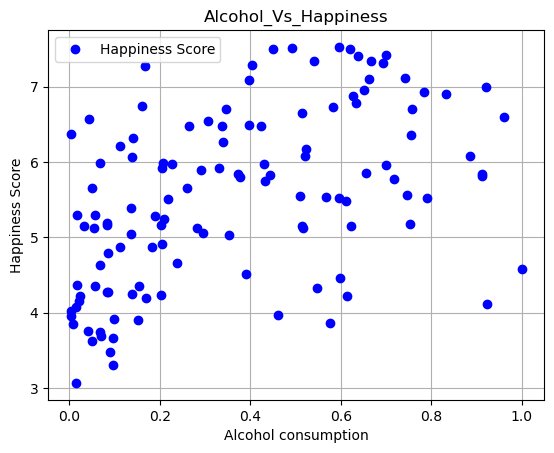

In [10]:
plt.plot(X,y,'bo')
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['Happiness Score'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

### Hypothesis

In [1]:
def computecost(x,y,theta):
    
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = (a)*(b)
    return j

In [2]:
#initialising parameter
m = np.size(y)
X = X.reshape([122,1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])
print(theta,'\n',m)

NameError: name 'np' is not defined

In [13]:
print(computecost(x,y,theta))

1941.7825705000002


### Gradient Descend

In [16]:
def gradient(x, y, theta):
    
    alpha = 0.00001
    iteration = 2000
    # gradient descent algorithm
    J_history = np.zeros([iteration, 1])
    
    for iter in range(0, 2000):
        
        error = (x @ theta) - y
        temp0 = theta[0] - ((alpha / m) * np.sum(error * x[:, 0]))
        temp1 = theta[1] - ((alpha / m) * np.sum(error * x[:, 1]))
        theta = np.array([temp0, temp1]).reshape(2, 1)
        J_history[iter] = (1 / (2 * m)) * (np.sum(((x @ theta) - y) ** 2))  # compute J value for each iteration 

    return theta, J_history


In [17]:
theta , J = gradient(x,y,theta)
print(theta)

[[4.4852401 ]
 [2.02333767]]


In [18]:
theta , J = gradient(x,y,theta)
print(J)

[[104.53691447]
 [104.5254844 ]
 [104.51410402]
 ...
 [108.47628733]
 [108.48053108]
 [108.48477477]]


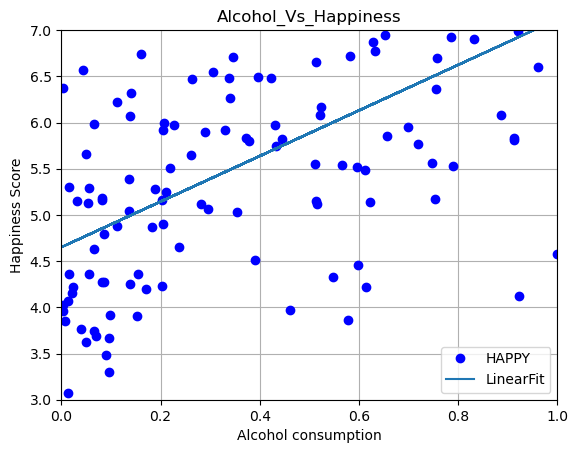

In [19]:
#plot linear fit for our theta
plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.axis([0,1,3,7])
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['HAPPY','LinearFit'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

In [20]:
#visualising J (theta0 , theta1)
theta0_vals = np.linspace(-5,10,100).reshape(1,100)
theta1_vals = np.linspace(-5,10,100).reshape(1,100)
#initialise J value to matrix of 0
J_vals = np.zeros([np.size(theta0_vals),np.size(theta1_vals)])
#fill J_vals
for i in range(0,np.size(theta0_vals)):
    for j in range(0,np.size(theta1_vals)):
        t = np.array([theta0_vals[:,i],theta1_vals[:,j]])
        J_vals[i,j] = computecost(x,y,t)
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

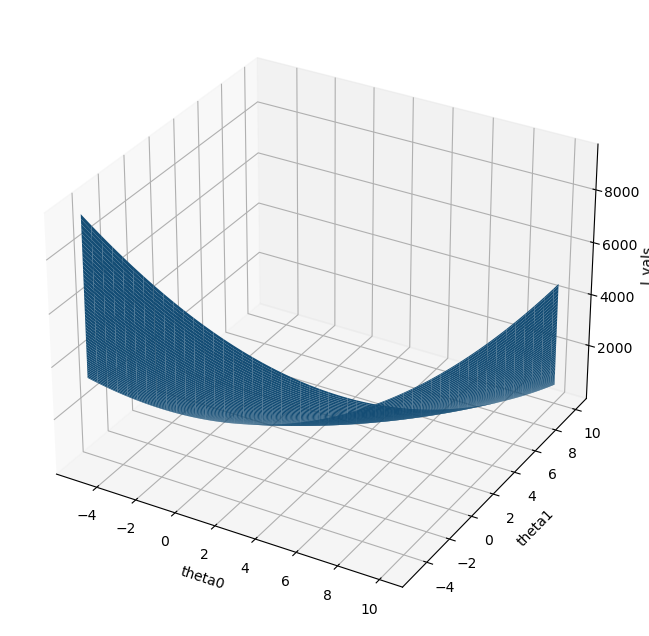

In [21]:
#surface plot for covergence
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=[12.0,8.0])
ax = fig.add_subplot(111,projection ='3d')
ax.plot_surface(theta0_vals,theta1_vals,J_vals)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J_vals')
plt.show()